## Lesson 10 - Statistics Packages

### Readings

* [Handbook of Biological Statistics](http://www.biostathandbook.com)

### Table of Contents

* [Basic statistics](#Basic-statistics)
* [Regression analysis](#Regression-analysis)
* [Correlation analysis](#Correlation-analysis)
* [Outlier detection](#Outlier-detection)
* [Tests of independence (of two nominal variables)](#Tests-of-independence-(of-two-nominal-variables))

In this lesson we'll consider some of the various statistics tools available in Python. Many packages provide statistical support: Pandas, Numpy, Scipy, and Scikit-learn.

You will probably have to install `scikit-learn` (`sklearn`) before proceeding:

```
pip install scikit_learn
```

In [1]:
%pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required packages
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# set up pandas and seaborn environments
pd.set_option("display.max_rows", 40)
sns.set()
sns.set_context("notebook")
sns.set_palette("colorblind")

### Basic statistics

#### Basic stats with Pandas

Pandas provides several methods for computing descriptive statistics and other related operations on Series, DataFrame, and Panel objects. Most of these are aggregations (hence producing a lower-dimensional result) like `sum()`, `mean()`, and `quantile()`, but some of them, like `cumsum()` and `cumprod()`, produce an object of the same size. Generally speaking, these methods take an axis argument:

* Series: no axis argument needed
* DataFrame: “index” (axis=0, default), “columns” (axis=1)
* Panel: “items” (axis=0), “major” (axis=1, default), “minor” (axis=2)

Function | Description
--------- | ----------
count | Number of non-null observations
sum | Sum of values
mean | Mean of values
mad | Mean absolute deviation
median | Arithmetic median of values
min | Minimum
max | Maximum
mode | Mode
abs | Absolute Value
prod | Product of values
std | Bessel-corrected sample standard deviation
var | Unbiased variance
sem | Standard error of the mean
skew | Sample skewness (3rd moment)
kurt | Sample kurtosis (4th moment)
quantile | Sample quantile (value at %)
cumsum | Cumulative sum
cumprod | Cumulative product
cummax | Cumulative maximum
cummin | Cumulative minimum

#### Example: Monthly temperature in Zugspitze from 1950 to 2025

This data has been downloaded and processed from the [Deutscher Wetterdienst](https://www.dwd.de/DE/wetter/wetterundklima_vorort/bayern/zugspitze/_node.html) open dataset ([search and download link](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html)). If you want to pre-process the data yourself, I have chosen the daily data and the station ID `5792` (Zugspitze). The main mappings are the following:

- `MESS_DATUM`: Measurement Date
- `RSK`: Daily rainfall (mm)
- `SDK`: Sunshine duration daily total (hours)
- `SHK_TAG`: Snow depth daily value (cm)
- `PM`: Daily mean air pressure (hPa)
- `UPM`: Daily mean relative humidity (%)
- `TMK`: Daily average temperature (C)
- `TNK`: Daily minimum air temperature at 2m height (C)
- `TXK`: Daily maximum air temperature at 2m height (C)

**Advice:** Any value set at `-999` is a missing measurement.

In [4]:
# import data with dates parsed
df_raw = pd.read_csv("../data/zugspitze_klima_tag_19500101_20241231_05792.txt", parse_dates=["Measurement Date"])
df_raw.head()

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C)
0,1950-01-01,0.0,8.0,190.0,709.5,-9.4,24.0,-7.9,-10.6
1,1950-01-02,7.0,1.2,180.0,707.0,-9.6,77.0,-7.4,-10.6
2,1950-01-03,16.1,0.0,200.0,695.8,-13.6,96.0,-9.0,-15.0
3,1950-01-04,38.0,0.0,220.0,693.5,-14.9,95.0,-14.7,-15.0
4,1950-01-05,8.5,0.2,270.0,696.9,-11.6,96.0,-10.8,-15.0


In [5]:
# we can see that the dataframe has thousands of rows...
df_raw.shape

(27394, 9)

In [6]:
# ...but we see that we also have one daily measurement
df_raw["Measurement Date"].value_counts()

Measurement Date
1950-01-01    1
2000-01-10    1
2000-01-08    1
2000-01-07    1
2000-01-06    1
             ..
1974-12-29    1
1974-12-28    1
1974-12-27    1
1974-12-26    1
2024-12-31    1
Name: count, Length: 27394, dtype: int64

In [7]:
# so let's calculate average temperature per year
df = df_raw.set_index("Measurement Date")
df = df.groupby(pd.Grouper(freq="YE")).mean()
df["YEAR"] = [x.year for x in df.index]
df.reset_index(inplace=True)

In [8]:
# examine the resulting dataframe
df.head(10)

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C),YEAR
0,1950-12-31,4.484110,5.301370,179.526027,706.919178,-4.093151,79.523288,-1.632055,-6.326027,1950
1,1951-12-31,5.119726,5.162192,235.010959,706.248493,-3.977534,78.358904,-1.429041,-6.186575,1951
2,1952-12-31,6.534153,4.333607,252.273224,705.632240,-5.319945,81.357923,-2.965574,-7.578962,1952
3,1953-12-31,4.250959,5.816164,168.301370,709.376438,-3.646027,74.509589,-1.103562,-5.797534,1953
4,1954-12-31,6.810685,4.478904,210.189041,705.702740,-5.154247,79.756164,-2.398630,-7.574521,1954
5,1955-12-31,6.026575,4.597534,251.832877,705.947671,-5.229589,81.443836,-2.625205,-7.492603,1955
6,1956-12-31,5.281694,5.168306,290.945355,706.196175,-5.824590,80.464481,-3.239617,-8.054918,1956
7,1957-12-31,4.387397,5.163836,172.600000,705.913151,-4.115890,78.361644,-1.721644,-6.276164,1957
8,1958-12-31,5.382192,5.179726,211.846575,703.952329,-4.299178,79.956164,-1.815342,-6.664110,1958
9,1959-12-31,4.464110,5.580822,127.372603,705.510137,-3.634247,75.452055,-0.893973,-5.798904,1959


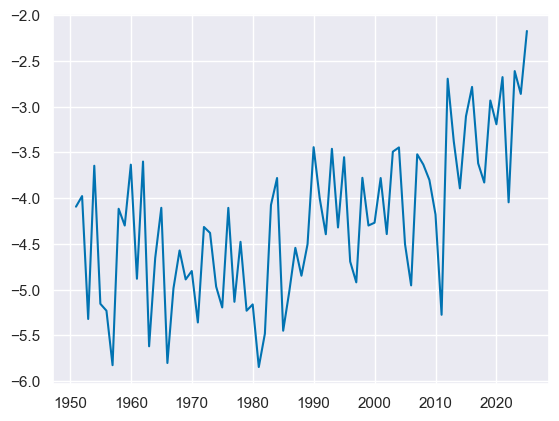

In [9]:
# explore the data using a plot
plt.plot(df["Measurement Date"], df["Daily average temperature (C)"]);

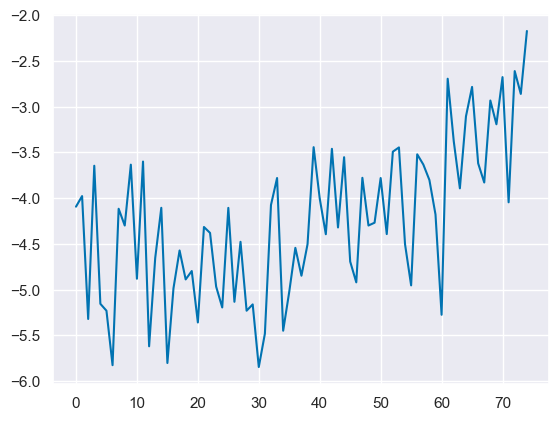

In [10]:
# make sure our index is sequential
plt.plot(df.index, df["Daily average temperature (C)"]);

In [11]:
# describe gives basic statistics
df.describe()

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C),YEAR
count,75,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1987-12-31 08:57:36,5.557061,5.130369,196.021456,706.478370,-4.252988,79.688635,-1.490660,-6.662369,1987.000000
min,1950-12-31 00:00:00,4.041096,4.181644,104.454795,702.233973,-5.844536,71.621918,-3.250411,-8.282787,1950.000000
25%,1969-07-01 12:00:00,5.051488,4.850137,158.094521,705.243562,-4.936411,78.335616,-2.219443,-7.232976,1968.500000
50%,1987-12-31 00:00:00,5.396986,5.162192,188.674863,706.602466,-4.298904,79.756164,-1.493151,-6.655890,1987.000000
75%,2006-07-01 12:00:00,6.126708,5.411644,222.882192,708.043151,-3.633425,81.266633,-0.851609,-6.141859,2005.500000
max,2024-12-31 00:00:00,7.464110,6.144658,355.816438,710.280822,-2.174317,86.454795,0.551639,-4.605191,2024.000000
std,NaN,0.840904,0.416793,52.846065,1.981029,0.850610,2.879043,0.908206,0.811752,21.794495


In [12]:
temperature = df["Daily average temperature (C)"]

In [13]:
# mean
temperature.mean()

np.float64(-4.2529883174888345)

In [14]:
# std
temperature.std()

np.float64(0.8506102133458082)

In [15]:
# quantile
temperature.quantile(0.25), temperature.quantile(0.5), temperature.quantile(0.75)

(np.float64(-4.936411033760012),
 np.float64(-4.298904109589041),
 np.float64(-3.6334246575342464))

In [16]:
# min and idxmin
temperature.min(), temperature.idxmin()

(np.float64(-5.8445355191256825), 30)

In [17]:
# max (with rounding) and idxmax
temperature.max(), temperature.max().round(1), temperature.idxmax()

(np.float64(-2.1743169398907103), np.float64(-2.2), 74)

In [18]:
# cumsum the cumulative sum
df_raw["Daily rainfall (mm)"].cumsum() / 1000

0          0.0000
1          0.0070
2          0.0231
3          0.0611
4          0.0696
           ...   
27389    152.2200
27390    152.2200
27391    152.2200
27392    152.2200
27393    152.2200
Name: Daily rainfall (mm), Length: 27394, dtype: float64

In [19]:
# value_counts
df.round()["Daily average temperature (C)"].value_counts()

Daily average temperature (C)
-4.0    31
-5.0    26
-3.0    13
-6.0     4
-2.0     1
Name: count, dtype: int64

In [20]:
# Have you ever been in a mountain and weather seems not to go your way?
# The data proves this happens quite often
sunshine_counts = df_raw["Sunshine duration daily total (hours)"].round().value_counts().sort_index()
sunshine_proportion = sunshine_counts / sunshine_counts.sum() * 100
sunshine_proportion.round(1)

Sunshine duration daily total (hours)
0.0     24.7
1.0      7.1
2.0      6.7
3.0      4.7
4.0      5.7
5.0      4.6
6.0      5.8
7.0      5.1
8.0      8.5
9.0      7.1
10.0     6.9
11.0     4.8
12.0     3.8
13.0     2.1
14.0     1.5
15.0     0.6
16.0     0.2
Name: count, dtype: float64

### Regression analysis

#### Regression with Seaborn

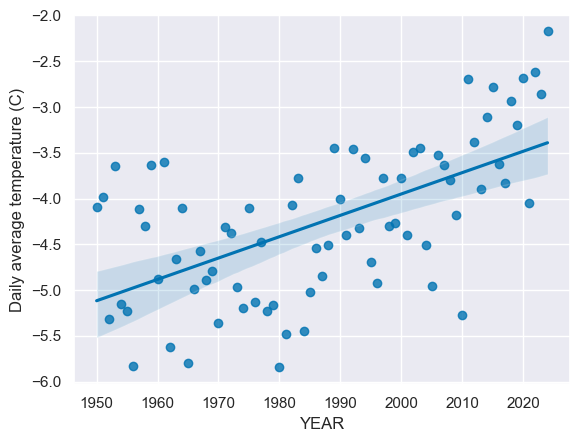

In [21]:
# regression with order=1 (linear)
sns.regplot(x="YEAR", y="Daily average temperature (C)", data=df, order=1);

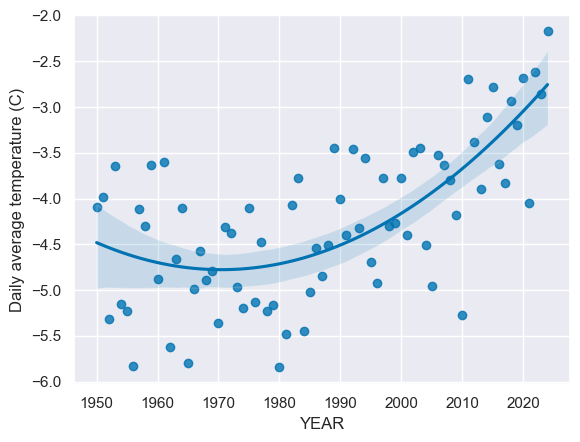

In [22]:
# regression with order=2 (parabolic)
sns.regplot(x="YEAR", y="Daily average temperature (C)", data=df, order=2);

Seaborn is handy to generate plots, but it doesn't provide easy access to the coefficients. For more control, we can use Numpy, Scipy, and other statistics packages.

#### Regression with Numpy

For numpy, [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) will fit a polynomial `p(x) = p[0] * x**deg + ... + p[deg]` of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.

We can evalaluate the polynomial afterward using the formula, or passing it to the [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) function.

##### np.polyfit - least squares polynomial fit (1st order)

In [23]:
year = df["YEAR"]

In [24]:
# linear (1st order) with np.polyfit
m, b = np.polyfit(year, temperature, 1)
m, b

(np.float64(0.02332215380130082), np.float64(-50.59410792067356))

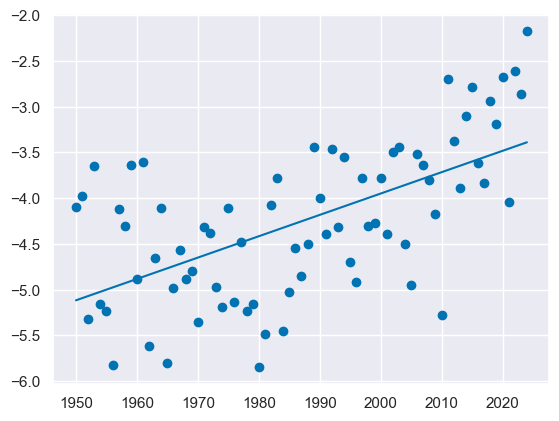

In [25]:
# plot scatter and polyfit
plt.scatter(year, temperature)
plt.plot(year, m * year + b, "-");

##### np.polyfit - least squares polynomial fit (2nd order)

In [26]:
# parabolic (2nd order) with np.polyfit
p = np.polyfit(year, temperature, 2)

In [27]:
# values of p are in decending order
p

array([ 7.05524723e-04, -2.78043309e+00,  2.73460608e+03])

In [28]:
# create a finely spaced x array
x1 = np.linspace(1950, 2024)
x1

array([1950.        , 1951.51020408, 1953.02040816, 1954.53061224,
       1956.04081633, 1957.55102041, 1959.06122449, 1960.57142857,
       1962.08163265, 1963.59183673, 1965.10204082, 1966.6122449 ,
       1968.12244898, 1969.63265306, 1971.14285714, 1972.65306122,
       1974.16326531, 1975.67346939, 1977.18367347, 1978.69387755,
       1980.20408163, 1981.71428571, 1983.2244898 , 1984.73469388,
       1986.24489796, 1987.75510204, 1989.26530612, 1990.7755102 ,
       1992.28571429, 1993.79591837, 1995.30612245, 1996.81632653,
       1998.32653061, 1999.83673469, 2001.34693878, 2002.85714286,
       2004.36734694, 2005.87755102, 2007.3877551 , 2008.89795918,
       2010.40816327, 2011.91836735, 2013.42857143, 2014.93877551,
       2016.44897959, 2017.95918367, 2019.46938776, 2020.97959184,
       2022.48979592, 2024.        ])

In [29]:
# calculate the y array for the fit curve using polyval
y1 = np.polyval(p, x1)
y1

array([-4.48070058, -4.52271626, -4.56151373, -4.59709299, -4.62945406,
       -4.65859692, -4.68452157, -4.70722802, -4.72671627, -4.74298632,
       -4.75603816, -4.7658718 , -4.77248723, -4.77588446, -4.77606349,
       -4.77302431, -4.76676693, -4.75729135, -4.74459756, -4.72868557,
       -4.70955538, -4.68720698, -4.66164038, -4.63285558, -4.60085257,
       -4.56563136, -4.52719194, -4.48553432, -4.4406585 , -4.39256447,
       -4.34125224, -4.28672181, -4.22897317, -4.16800633, -4.10382129,
       -4.03641804, -3.96579659, -3.89195694, -3.81489908, -3.73462302,
       -3.65112875, -3.56441628, -3.47448561, -3.38133673, -3.28496965,
       -3.18538437, -3.08258088, -2.97655919, -2.8673193 , -2.7548612 ])

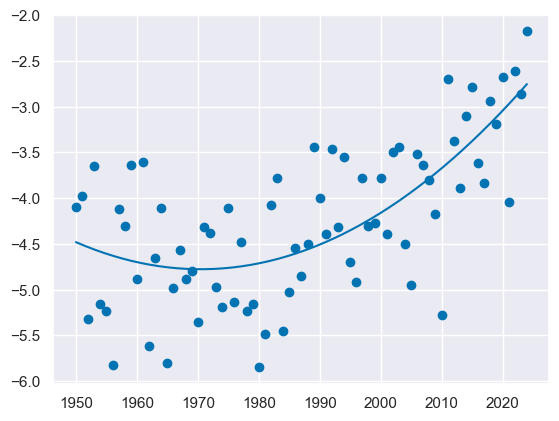

In [30]:
# plot data then curve
plt.scatter(year, temperature)
plt.plot(x1, y1, "-");

In [31]:
# 3rd order with np.polyfit
p = np.polyfit(year, temperature, 3)

In [32]:
# generate curve with polyval
y1 = np.polyval(p, x1)

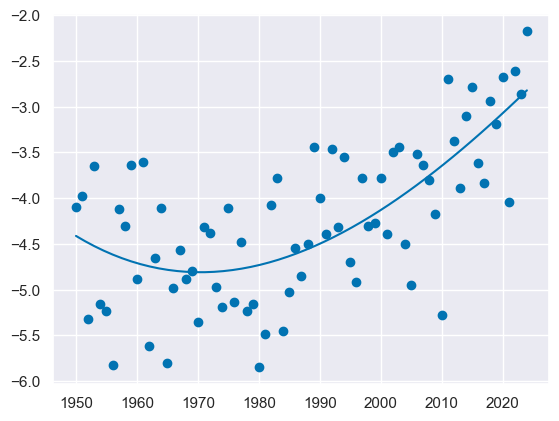

In [33]:
# plot data then curve
plt.scatter(year, temperature)
plt.plot(x1, y1, "-");

#### Fitting time series to a sinusoidal wave

First, a refresher on sine waves:

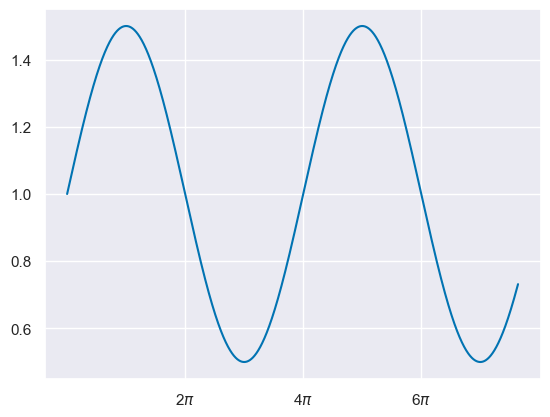

In [34]:
# initialize sine wave parameters
period = 4 * np.pi
freq = (2 * np.pi) / period
phase = 0
amplitude = 0.5
offset = 1
# generate x and y arrays for sine wave
x1 = np.linspace(0, 24, num=2000)
y1 = np.sin(x1 * freq + phase) * amplitude + offset
# plot sine wave
fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.set_xticks([2 * np.pi, 4 * np.pi, 6 * np.pi])
ax.set_xticklabels(["2$\\pi$", "4$\\pi$", "6$\\pi$"]);

We are now going to regroup our dataset into montly samples for a more detailed view of our data. We are instead going to select the last 10 years for a more easy to visualize dataset:

In [35]:
# so let's calculate average temperature per year
df_monthly = df_raw[df_raw["Measurement Date"] > np.datetime64("2015-01-01")]
df_monthly.set_index("Measurement Date", inplace=True)
df_monthly = df_monthly.groupby(pd.Grouper(freq="ME")).mean()
df_monthly["MONTH"] = [x.month for x in df_monthly.index]
df_monthly.reset_index(inplace=True)

Fit a sine wave to the monthly temperature data:

In [36]:
# we are going to use the numerical index for our "t" variable;
# make sure our index is sequential (December 2008 is zero)
df_monthly.sort_index(inplace=True)
df_monthly.head(n=15)

,Measurement Date,Daily rainfall (mm),Sunshine duration daily total (hours),Snow depth daily value (cm),Daily mean air pressure (hPa),Daily average temperature (C),Daily mean relative humidity (%),Daily maximum air temperature at 2m height (C),Daily minimum air temperature at 2m height (C),MONTH
0,2015-01-31,6.720000,3.393333,249.233333,701.880000,-10.940000,77.533333,-7.713333,-13.606667,1
1,2015-02-28,2.807143,6.082143,315.000000,700.535714,-10.764286,64.285714,-7.560714,-13.167857,2
2,2015-03-31,5.764516,5.838710,347.419355,705.877419,-8.509677,72.193548,-5.712903,-11.345161,3
3,2015-04-30,5.210000,7.416667,444.433333,708.533333,-6.703333,73.166667,-3.766667,-9.536667,4
4,2015-05-31,10.129032,4.070968,423.483871,709.922581,-1.725806,88.225806,0.645161,-4.080645,5
5,2015-06-30,5.573333,5.623333,314.333333,714.920000,2.146667,88.000000,5.050000,-0.490000,6
6,2015-07-31,3.416129,7.083871,125.903226,716.880645,6.493548,81.000000,9.874194,3.177419,7
7,2015-08-31,4.716129,6.370968,0.096774,716.216129,6.009677,82.032258,8.800000,3.625806,8
8,2015-09-30,4.580000,5.250000,7.533333,711.070000,-0.866667,84.733333,2.040000,-3.590000,9
9,2015-10-31,2.583871,6.029032,21.967742,709.396774,-2.129032,76.290323,0.483871,-4.600000,10


In [37]:
# store our values as new variables
index_monthly = df_monthly.index
temperature_monthly = df_monthly["Daily average temperature (C)"]

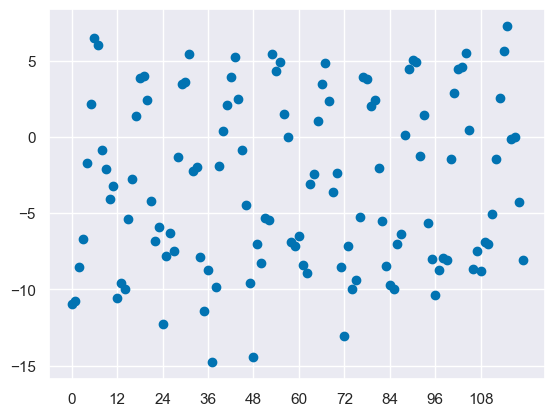

In [38]:
plt.scatter(index_monthly, temperature_monthly)
plt.xticks(np.arange(0, df_monthly.index.max(), 12));

In [39]:
# guess the sine wave properties - they are a starting point for my optimization attempt
guess_period = 12
guess_freq = (2 * np.pi) / guess_period
guess_phase = 0
guess_amplitude = 10
guess_offset = -5

p0 = [guess_freq, guess_amplitude, guess_phase, guess_offset]

In [40]:
# create a function that returns the curve to fit our data to
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

In [41]:
# now fit the curve to the data using scipy.optimize.curve_fit
fit = scipy.optimize.curve_fit(my_sin, index_monthly, temperature_monthly, p0=p0)

In [42]:
# compare the guessed values...
p0

[0.5235987755982988, 10, 0, -5]

In [43]:
# ...with the fit values
fit

(array([ 0.52330858,  7.41339935, -1.8141294 , -3.10942409]),
 array([[ 9.90249239e-07, -3.70339252e-06, -5.97774886e-05,
          1.23054202e-05],
        [-3.70339252e-06,  6.49842280e-02,  2.27957761e-04,
         -7.75884580e-05],
        [-5.97774886e-05,  2.27957761e-04,  4.79002717e-03,
         -7.45281950e-04],
        [ 1.23054202e-05, -7.75884580e-05, -7.45281950e-04,
          3.26286374e-02]]))

In [44]:
# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(index_monthly, *p0)

In [45]:
# recreate the fitted curve using the optimized parameters
data_fit = my_sin(index_monthly, *fit[0])

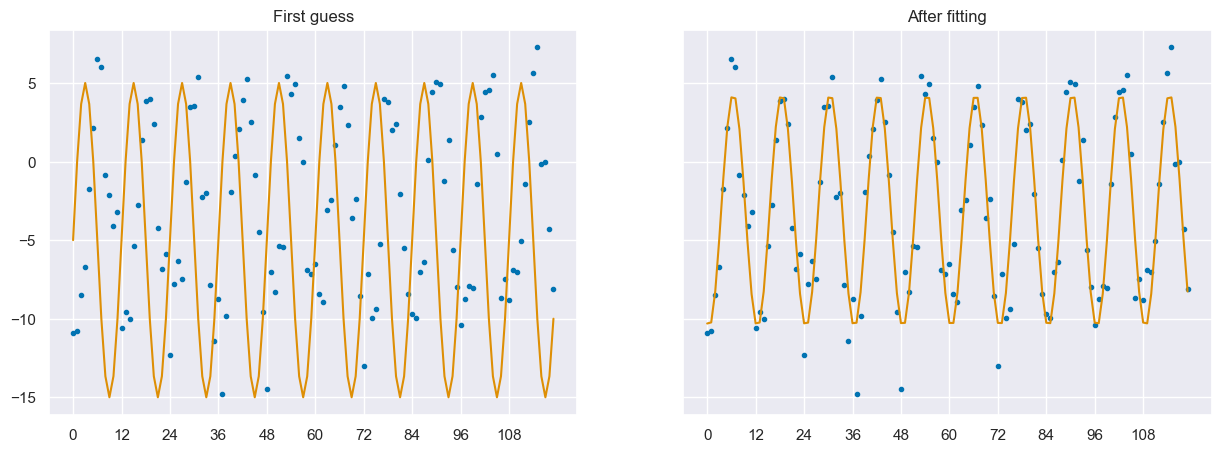

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.plot(temperature_monthly, ".")
ax1.plot(data_first_guess)
ax1.set_title("First guess")
ax2.plot(temperature_monthly, ".")
ax2.plot(data_fit)
ax2.set_title("After fitting")
# we use setp
plt.setp((ax1, ax2), xticks=np.arange(0, index_monthly.max(), 12));

### Correlation Analysis

#### Example: Correlation analysis with World dataset

I retrieved some country metrics from the world dataset ([_Global Country Information Dataset 2023_, Nidula Elgiriyewithana, available at Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)).

Very important to notice that **correlation does not imply causation**:

<center>
<img src="../images/Correlation_verses_causation_demonstration_chart.png" width="40%"/>
</center>

In [47]:
df_world_raw = pd.read_csv("../data/world-data-2023.csv", thousands=",")
df_world_raw.columns

Index(['Country', 'Density (P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [48]:
df_world = df_world_raw[["Country", "Life expectancy", "Total tax rate", "GDP", "Population", "Co2-Emissions"]]
df_world = df_world.dropna()
df_world["GDP"] = df_world["GDP"].str.replace("$", "").str.replace(",", "").astype(int)
df_world["Total tax rate"] = df_world["Total tax rate"].str.replace("%", "").astype(float)
df_world["GPD (per capita)"] = df_world["GDP"] / df_world["Population"]
df_world

,Country,Life expectancy,Total tax rate,GDP,Population,Co2-Emissions,GPD (per capita)
0,Afghanistan,64.5,71.4,19101353833,38041754.0,8672.0,502.115487
1,Albania,78.5,36.6,15278077447,2854191.0,4536.0,5352.857411
2,Algeria,76.7,66.1,169988236398,43053054.0,150006.0,3948.343279
4,Angola,60.8,49.1,94635415870,31825295.0,34693.0,2973.591160
5,Antigua and Barbuda,76.9,43.0,1727759259,97118.0,557.0,17790.309304
...,...,...,...,...,...,...,...
190,Venezuela,72.1,73.3,482359318768,28515829.0,164175.0,16915.493453
191,Vietnam,75.3,37.6,261921244843,96462106.0,192668.0,2715.276036
192,Yemen,66.1,26.6,26914402224,29161922.0,10609.0,922.929642
193,Zambia,63.5,15.6,23064722446,17861030.0,5141.0,1291.343357


##### Pearson correlation

In [49]:
# learn more about pearsonr (values correlation)
?scipy.stats.pearsonr

Signature: scipy.stats.pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed f

In [50]:
# pearson correlation (linear regression on values) of GDP (per capita) and Total tax rate
scipy.stats.pearsonr(df_world["GPD (per capita)"], df_world["Total tax rate"])

PearsonRResult(statistic=np.float64(-0.1851295006902968), pvalue=np.float64(0.012349684633145395))

In [51]:
# pearson correlation (linear regression on values) of GDP (per capita) and Life expectancy
scipy.stats.pearsonr(df_world["GPD (per capita)"], df_world["Life expectancy"])

PearsonRResult(statistic=np.float64(0.6129079344922773), pvalue=np.float64(3.720243770032608e-20))

In [52]:
# pearson correlation (linear regression on values) of GDP and Co2-Emissions
scipy.stats.pearsonr(df_world["GDP"], df_world["Co2-Emissions"])

PearsonRResult(statistic=np.float64(0.9167663784901976), pvalue=np.float64(1.1724864215307804e-73))

##### Spearman correlation

In [53]:
?scipy.stats.spearmanr

Signature:
scipy.stats.spearmanr(
    a,
    b=None,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
)
Docstring:
Calculate a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure
of the monotonicity of the relationship between two datasets.
Like other correlation coefficients,
this one varies between -1 and +1 with 0 implying no correlation.
Correlations of -1 or +1 imply an exact monotonic relationship. Positive
correlations imply that as x increases, so does y. Negative correlations
imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Spearman correlation at least as extreme
as the one computed from these datasets. Although calculation of the
p-value does not make strong assumptions about the distributions underlying
the samples, it is only accurate for very large samples (>500
observations). F

In [54]:
# spearman correlation of GDP (per capita) and Total tax rate
scipy.stats.spearmanr(df_world["GPD (per capita)"], df_world["Total tax rate"])

SignificanceResult(statistic=np.float64(-0.19595138318522076), pvalue=np.float64(0.008023814994000006))

In [55]:
# spearman correlation of GDP (per capita) and Life expectancy
scipy.stats.spearmanr(df_world["GPD (per capita)"], df_world["Life expectancy"])

SignificanceResult(statistic=np.float64(0.8571654662853858), pvalue=np.float64(9.361005145452863e-54))

In [56]:
# spearman correlation of GDP and Co2-Emissions
scipy.stats.spearmanr(df_world["GDP"], df_world["Co2-Emissions"])

SignificanceResult(statistic=np.float64(0.9489240636420673), pvalue=np.float64(4.142082317272138e-92))

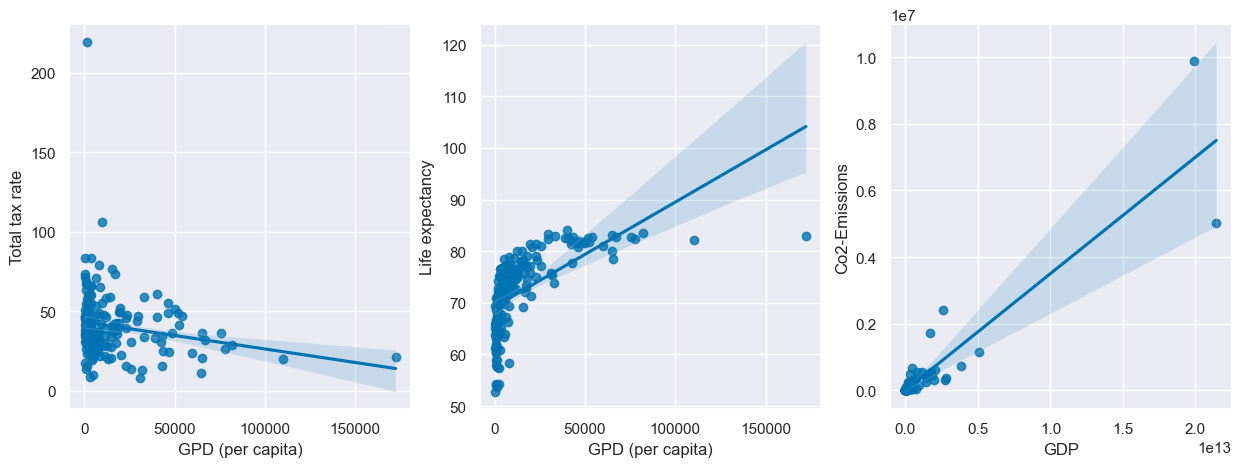

In [57]:
# plot linear regressions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x="GPD (per capita)", y="Total tax rate", data=df_world, ax=ax1)
sns.regplot(x="GPD (per capita)", y="Life expectancy", data=df_world, ax=ax2)
sns.regplot(x="GDP", y="Co2-Emissions", data=df_world, ax=ax3);

It looks great, but it seems like there are a couple of exceptions (called outliers) in our dataset, especifically on the "Total tax rate" one. We can dig deeper on that one with outlier detection.

### Outlier detection

#### Z-Score test for outliers

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.

Many statistical tests can be conveniently performed as approximate Z-tests if the sample size is large or the population variance is known.

If the population variance is unknown (and therefore has to be estimated from the sample itself) and the sample size is not large (n < 30), the Student's t-test may be more appropriate (in some cases, n < 50).

<center>
<img src="../images/Z-score.png" width="40%"/>
</center>

Let's first test if any of the values fall in a normal distribution:

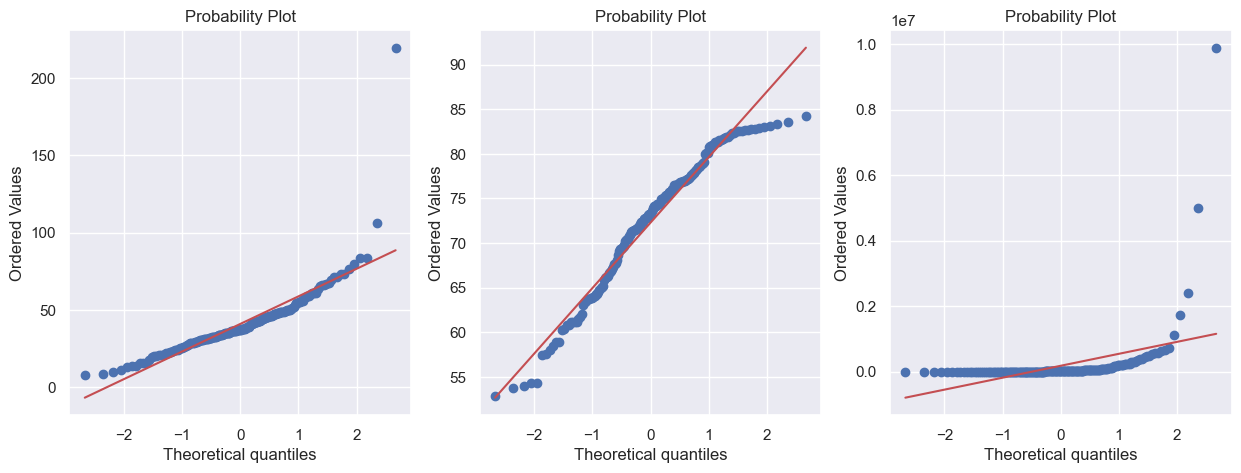

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
scipy.stats.probplot(df_world["Total tax rate"], dist="norm", plot=ax1)
scipy.stats.probplot(df_world["Life expectancy"], dist="norm", plot=ax2)
scipy.stats.probplot(df_world["Co2-Emissions"], dist="norm", plot=ax3);

Seems like the best normal distribution is the "Total tax rate", although not really a perfect match.

We will use Z-Score to figure out which elements are the outlier from this dataset. From out figure above, we can consider the 99% percentile, or the value of 2.576:

In [59]:
tax_rate = df_world[["Country", "Total tax rate", "GPD (per capita)"]].copy()
tax_rate["Z-Score"] = scipy.stats.zscore(df_world["Total tax rate"])
outliers = tax_rate[(tax_rate["Z-Score"] > 2.576) | (tax_rate["Z-Score"] < -2.576)]
outliers

,Country,Total tax rate,GPD (per capita),Z-Score
6,Argentina,106.3,10006.148974,3.184279
38,Comoros,219.6,1393.522372,8.696376


For reference, the dataset defines the "Total tax rate" as _Overall tax burden as a percentage of commercial profits_.

We can remove those outliers and plot the different result:

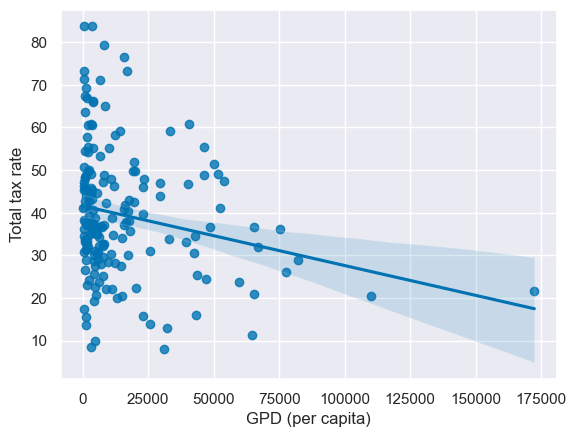

In [60]:
non_outlier = tax_rate[(tax_rate["Z-Score"] <= 2.576) & (tax_rate["Z-Score"] >= -2.576)]
sns.regplot(x="GPD (per capita)", y="Total tax rate", data=non_outlier);

As we can see from the plot, even when we remove the outliers, there seems to be not that much correlation between the two values, as proven in our previous Pearson and Spearman correlation tests.

#### Clustering for outlier detection

We can also train our own algorithms for outlier detection for more complex scenarios. Those algorithms will try to fit on the given data, and can also be adjusted for a custom fit. Here are a couple of examples from the [official Scipy documentation for Novelty and Outlier detection](https://scikit-learn.org/stable/modules/outlier_detection.html):

<center>
<img src="../images/Scikit-outlier-methods.png" width="50%"/>
</center>

We are going to try and cluster our "Co2 Emissions" vs "GDP" plot, because there seems to be a cluster with just a couple of outliers, and we want to figure out who they are:

,Country,GDP,Co2-Emissions
36,China,19910000000000,9893038.0
48,Dominica,596033333,180.0
89,Kiribati,194647202,66.0
107,Marshall Islands,221278000,143.0
111,Federated States of Micronesia,401932279,143.0
132,Palau,283994900,224.0
150,S�����������,429016605,121.0
176,Tonga,450353314,128.0
186,United States,21427700000000,5006302.0


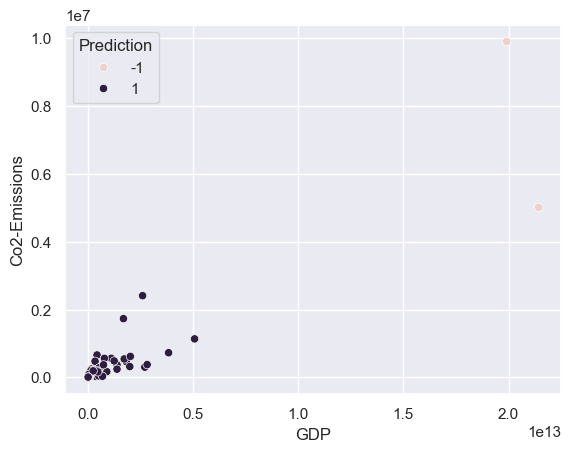

In [92]:
X = df_world[["GDP", "Co2-Emissions"]].values
# we have to scale the data for the method
X_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
# Then fit our model
model = sklearn.svm.OneClassSVM(nu=0.05, gamma=0.1)
model.fit(X_scaled)
X_predicted = model.predict(X_scaled)
# we then try to plot the results
df_world["Prediction"] = X_predicted
sns.scatterplot(df_world, x="GDP", y="Co2-Emissions", hue="Prediction")
df_world[df_world["Prediction"] == -1][["Country", "GDP", "Co2-Emissions"]]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Axes: xlabel='GDP', ylabel='Co2-Emissions'>

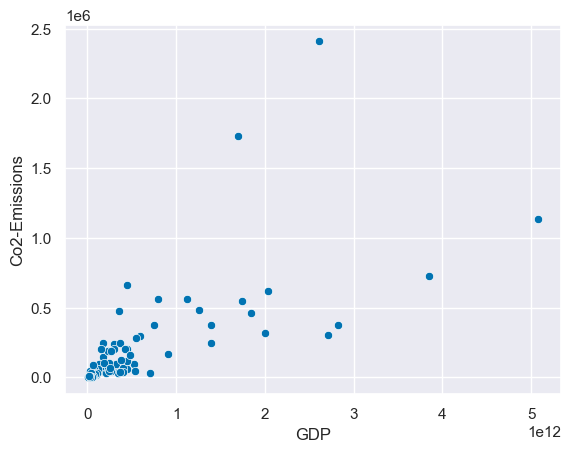

In [93]:
# and the plot of only the entries that are inliers
sns.scatterplot(df_world[df_world["Prediction"] == 1], x="GDP", y="Co2-Emissions")

### Tests of independence (of two nominal variables)

Source: [Handbook of Biological Statistics](http://www.biostathandbook.com) by John H. McDonald

Test | Purpose | Notes | Example
----- | ----- | ----- | -----
Fisher's exact test | Test hypothesis that proportions are the same in different groups | Use for small sample sizes (less than 1000) | Count the number of live and dead patients after treatment with drug or placebo, test the hypothesis that the proportion of live and dead is the same in the two treatments, total number of samples <1000
Chi-square test of independence | Test fit of observed frequencies to expected frequencies | Use for large sample sizes (greater than 1000) | Count the number of live and dead patients after treatment with drug or placebo, test the hypothesis that the proportion of live and dead is the same in the two treatments, total number of samples >1000

#### Fisher's exact test

Use the Fisher's exact test of independence when you have two nominal variables and you want to see whether the proportions of one variable are different depending on the value of the other variable. Use it when the sample size is small.

Parameters
* table: array_like of ints.
    A 2x2 contingency table.  Elements should be non-negative integers.
* alternative: {'two-sided', 'less', 'greater'}, optional.
    Which alternative hypothesis to the null hypothesis the test uses.
    Default is 'two-sided'.

Returns
* oddsratio: float.
    The odds ratio in the form "unconditional Maximum Likelihood Estimate". This is a prior odds ratio and not a posterior estimate.
* p_value: float.
    p-value, the probability of obtaining a distribution at least as
    extreme as the one that was actually observed, assuming that the
    null hypothesis is true.

Say we spend a few days counting whales and sharks in the Atlantic and
Indian oceans. In the Atlantic ocean we find 8 whales and 1 shark, in the
Indian ocean 2 whales and 5 sharks. Then our contingency table is:

In [ ]:
f = pd.DataFrame([[8, 2], [1, 5]], index=["Atlantic", "Indian"], columns=["whales", "sharks"])
f

We use this table to find the p-value:

In [ ]:
odds_ratio, p_value = scipy.stats.fisher_exact(f, alternative="two-sided")
odds_ratio, p_value

The probability that we would observe this or an even more imbalanced ratio
by chance is about 3.5%.  A commonly used significance level is 5%--if we
adopt that, we can therefore conclude that our observed imbalance is
statistically significant; whales prefer the Atlantic while sharks prefer
the Indian Ocean.

For tables with large numbers, the (inexact) chi-square test implemented
in the function `chi2_contingency` can also be used.

#### Chi-square test of independence

Use the chi-square test of independence when you have two nominal variables and you want to see whether the proportions of one variable are different for different values of the other variable. Use it when the sample size is large.

Parameters:
* observed: array_like.
    The contingency table. The table contains the observed frequencies
    (i.e., number of occurrences) in each category.  In the two-dimensional
    case, the table is often described as an "R x C table".

Returns:

* chi2: float.
    The test statistic.
* p: float.
    The p-value of the test
* dof: int.
    Degrees of freedom
* expected: ndarray, same shape as `observed`.
    The expected frequencies, based on the marginal sums of the table.

In [ ]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(f)
chi2, p, dof, expected